## 필수과제2 (직접 제가 드린 데이터셋)
- 정말 피처가 많은 데이터
- 그 데이터를 피처 셀렉션해서 실제 어떤 피처만 추출할지? 
    - 기준에 대한 이유
    - 코드(주석설명)
    - 실제 선택된 피처는 무엇인지?

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/yc_hur/Desktop/DBA/dataset/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
## 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
## 결측치 확인

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

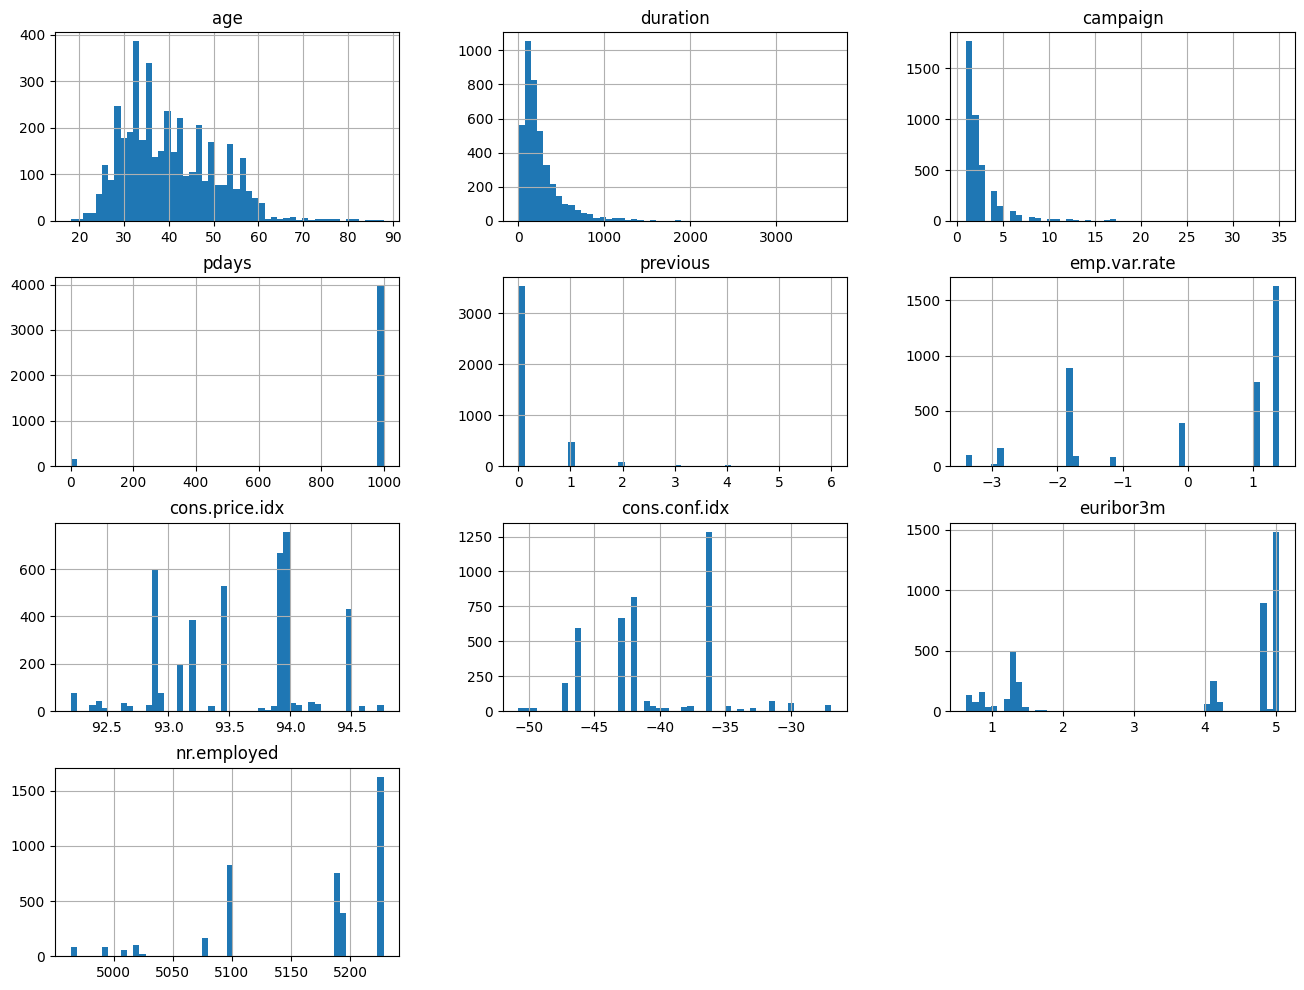

In [5]:
## 히스토그램 확인

df.hist(bins=50, figsize=(16, 12))

In [6]:
df['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [7]:
X = df.drop(columns='y')
y = df['y']

In [8]:
print(X.shape)

(4119, 20)


In [9]:
# 연속형 변수들을 4분위로 나누기 (qcut 사용)
continuous_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in continuous_cols:
    X[col] = pd.qcut(X[col], q=4, labels=False, duplicates='drop')

In [10]:
# 범주형 변수(object 타입)를 Label Encoding으로 변환
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

y_encoded = label_encoder.fit_transform(y)

In [11]:
# OneHotEncoder 적용 (drop='first'로 첫 번째 카테고리 드롭)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X)

In [12]:
print(X_encoded.shape)
print(X_encoded[:5])  # 첫 5개 행 확인

(4119, 64)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0

- 총 Feature의 개수는 64개

In [13]:
# SelectKBest를 사용한 카이제곱 피처 선택 (모든 피처에 대해 점수 계산)

from sklearn.feature_selection import SelectKBest, chi2
chi_selector = SelectKBest(chi2, k='all')  # k='all'로 모든 피처의 점수를 계산
X_kbest = chi_selector.fit_transform(X_encoded, y_encoded)

In [14]:
# 각 피처의 chi-square 점수 확인

chi_scores =pd.DataFrame({
    'Feature': onehot_encoder.get_feature_names_out(X.columns),
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=True)

In [15]:
chi_scores

,Feature,Score
42,day_of_week_3,0.014311
27,housing_2,0.016201
13,job_11,0.019201
16,marital_3,0.038961
41,day_of_week_2,0.040216
...,...,...
39,month_9,57.804389
63,nr.employed_2,63.701806
35,month_5,110.530910
46,duration_3,342.344792


In [16]:
#선택된 피처들 점수 산출
selected_indices=chi_selector.get_support(indices=True)
selected_features=onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 64 artists>

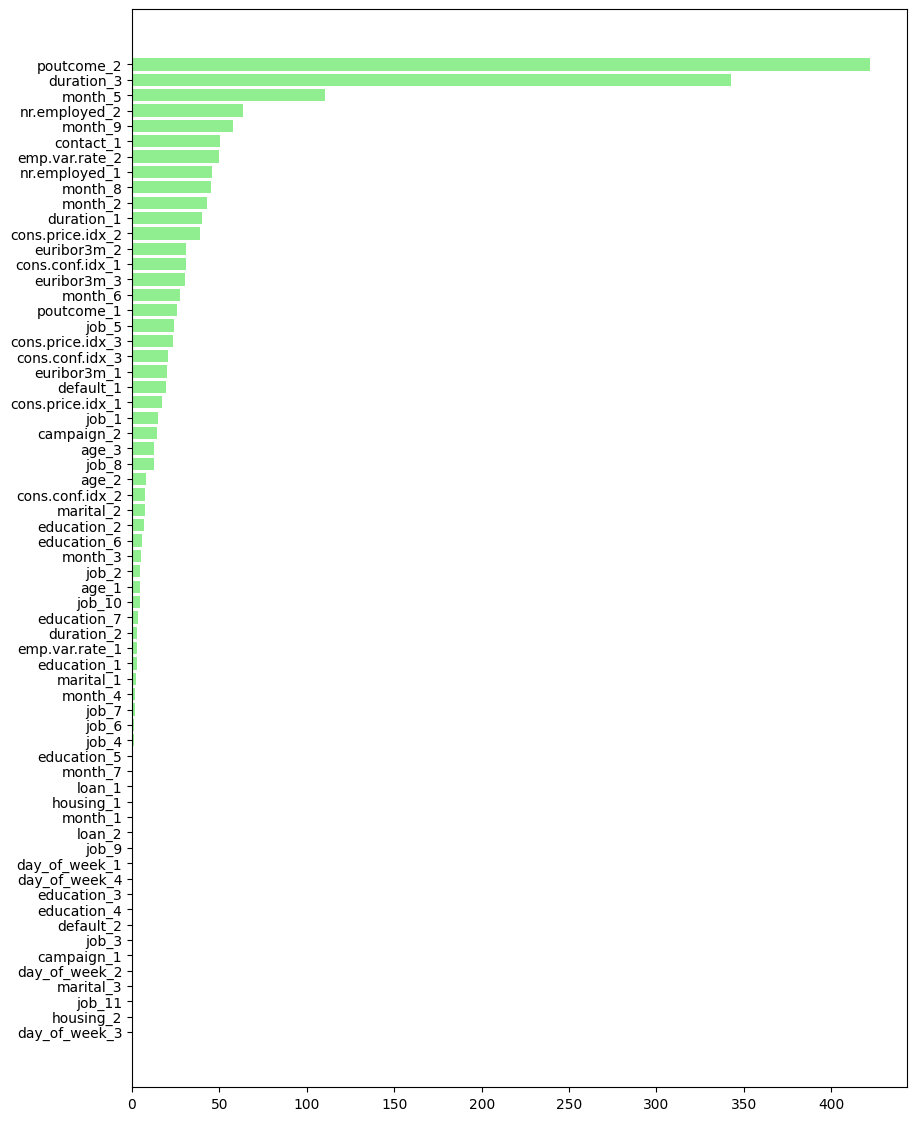

In [17]:
##간단한 시각화
plt.figure(figsize=(10,14))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightgreen')

In [18]:
# 상위 30개만 찍어줘!

chi_selector =SelectKBest(chi2, k=30)
X_selected =chi_selector.fit_transform(X_encoded,y_encoded)

In [19]:
print(X_selected)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
#선택된 피처들 점수 산출
selected_indices=chi_selector.get_support(indices=True)
selected_features=onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 30 artists>

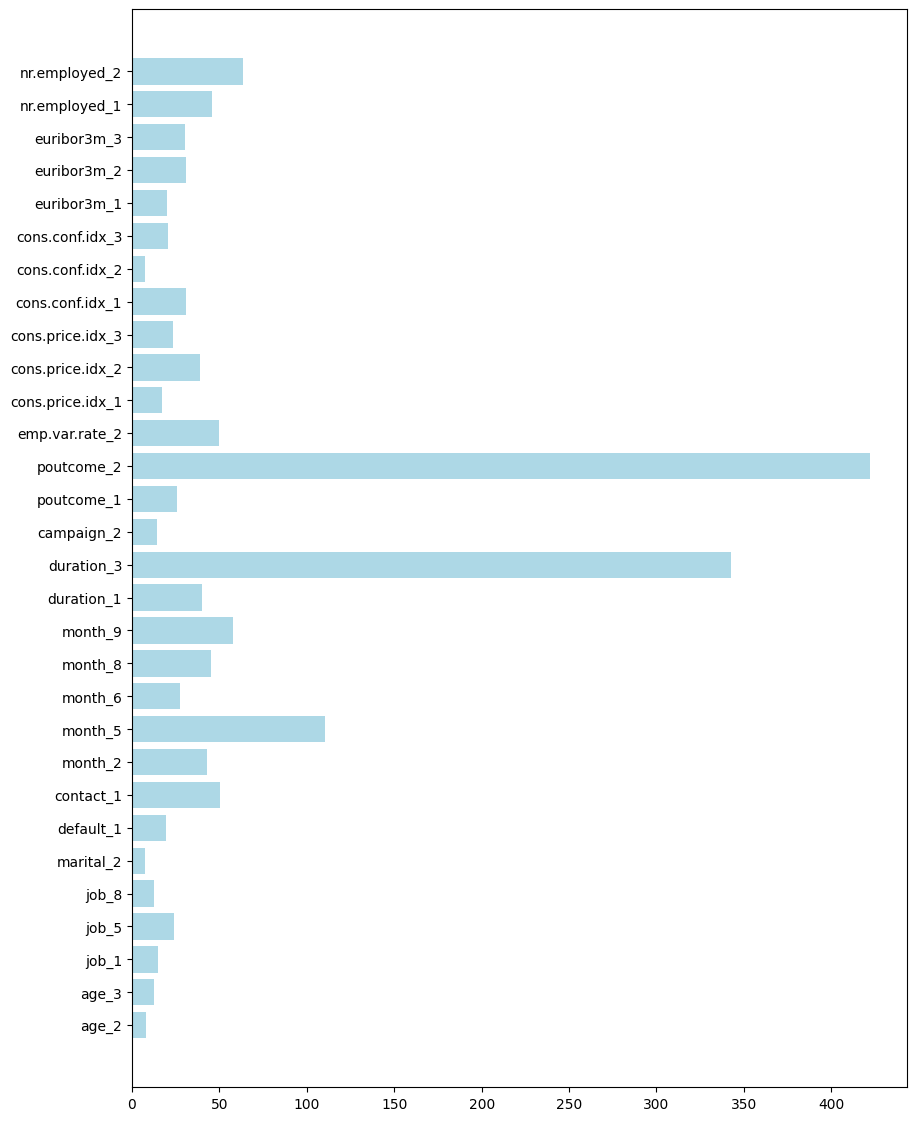

In [21]:
##간단한 시각화
plt.figure(figsize=(10,14))
plt.barh(selected_features, selected_scores, color='lightblue')

# 전체 Feature로 Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [23]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=111)

In [24]:
# 모델 학습 (Logistic Regression)
model_full = LogisticRegression()
model_full.fit(X_train_full, y_train_full)

# 예측
y_pred = model_full.predict(X_test_full)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_full, y_pred)}')

Accuracy: 0.9053398058252428
F1 Score: 0.4090909090909091
Confusion Matrix:
[[719  13]
 [ 65  27]]


# 선택된 Feature(30개)로 Logistic Regression

In [25]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=111)

In [26]:
# 모델 학습 (Linear Regression)
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train_selected)

# 예측
y_pred = model_selected.predict(X_test_selected)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test_selected, y_pred)
f1 = f1_score(y_test_selected, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_selected, y_pred)}')

Accuracy: 0.9077669902912622
F1 Score: 0.4153846153846154
Confusion Matrix:
[[721  11]
 [ 65  27]]


## 선택 Feature가 상위 25개인 경우

In [27]:
# 상위 25개만 찍어줘!

chi_selector =SelectKBest(chi2, k=25)
X_selected =chi_selector.fit_transform(X_encoded,y_encoded)

In [28]:
#선택된 피처들 점수 산출
selected_indices=chi_selector.get_support(indices=True)
selected_features=onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 25 artists>

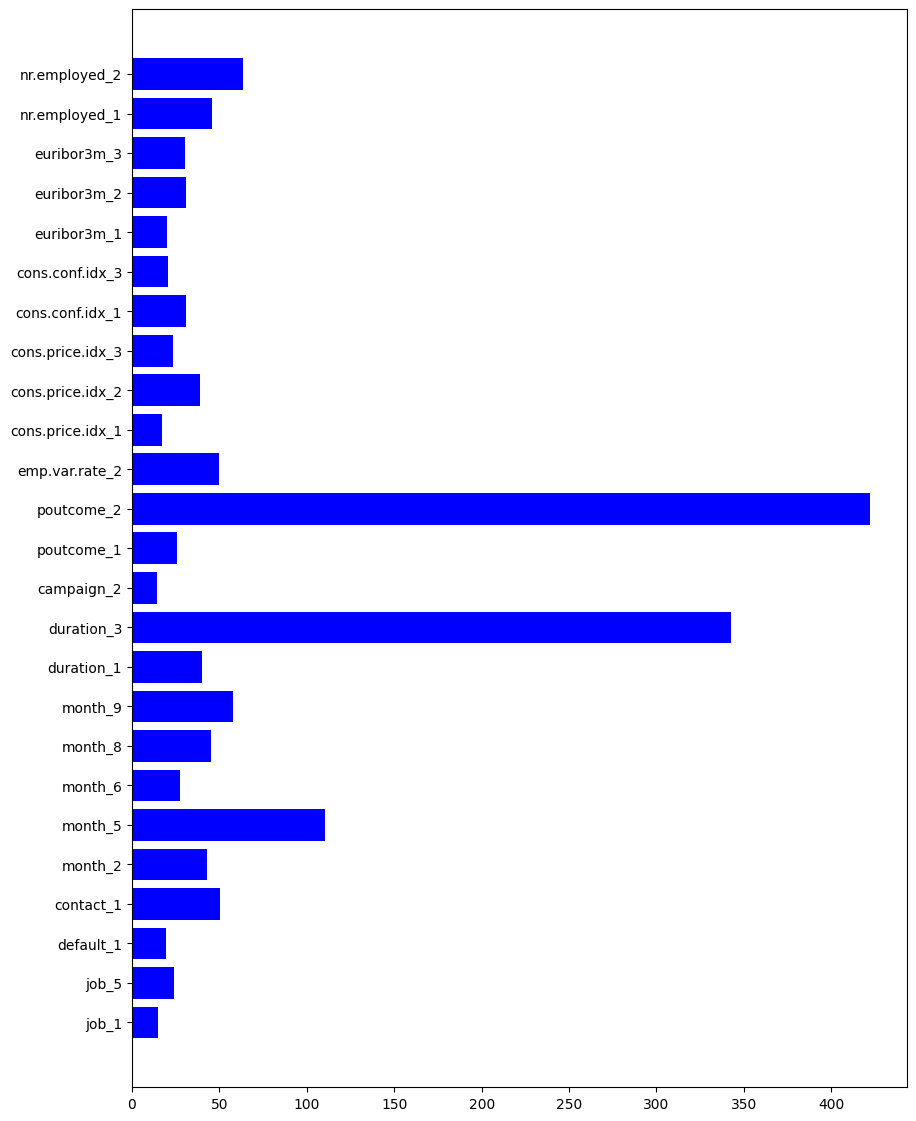

In [29]:
##간단한 시각화
plt.figure(figsize=(10,14))
plt.barh(selected_features, selected_scores, color='blue')

In [30]:
# Logistic Regression 상위 25개

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=111)

In [31]:
# 모델 학습 (Linear Regression)
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train_selected)

# 예측
y_pred = model_selected.predict(X_test_selected)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test_selected, y_pred)
f1 = f1_score(y_test_selected, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_selected, y_pred)}')

Accuracy: 0.9077669902912622
F1 Score: 0.40625
Confusion Matrix:
[[722  10]
 [ 66  26]]


## 선택 Feature가 상위 35개인 경우

In [32]:
# 상위 35개만 찍어줘!

chi_selector =SelectKBest(chi2, k=35)
X_selected =chi_selector.fit_transform(X_encoded,y_encoded)

In [33]:
#선택된 피처들 점수 산출
selected_indices=chi_selector.get_support(indices=True)
selected_features=onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 35 artists>

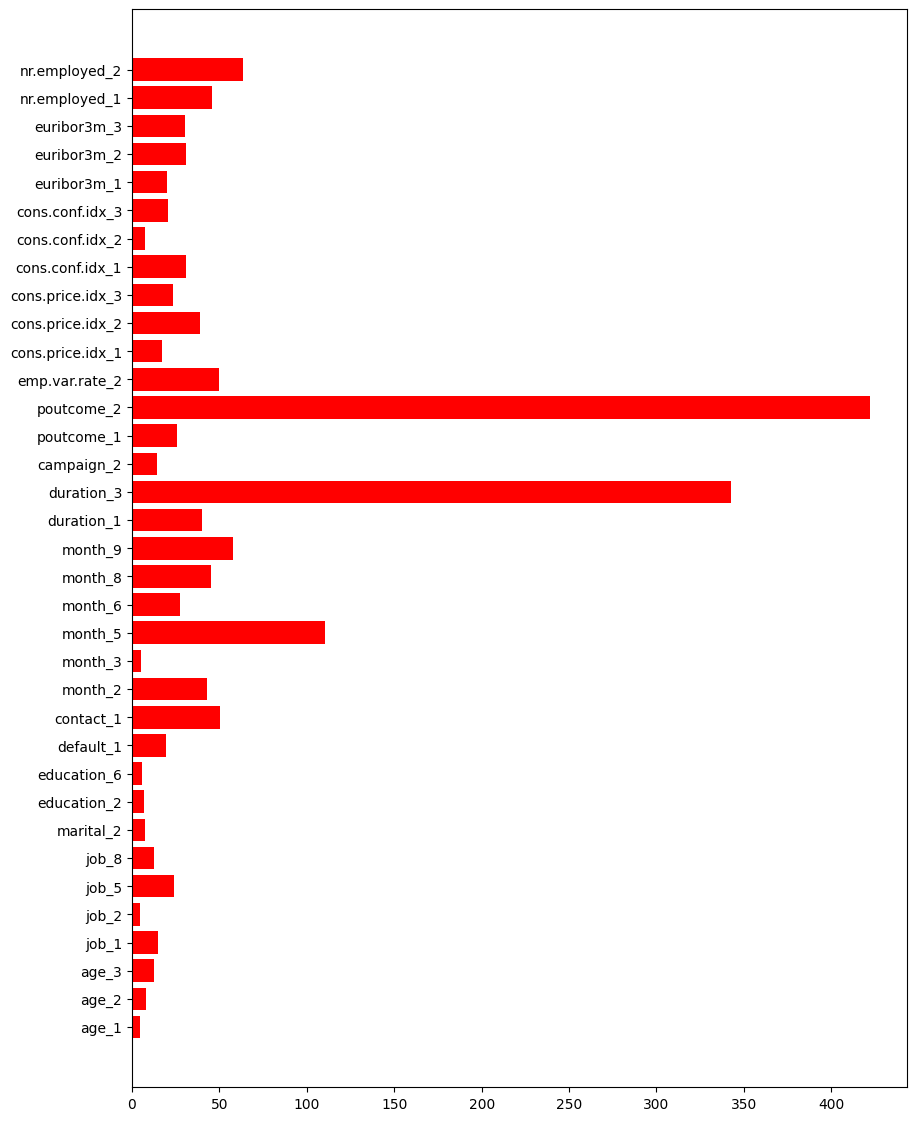

In [34]:
##간단한 시각화
plt.figure(figsize=(10,14))
plt.barh(selected_features, selected_scores, color='red')

In [35]:
# Logistic Regression 상위 35개

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=111)

In [36]:
# 모델 학습 (Linear Regression)
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train_selected)

# 예측
y_pred = model_selected.predict(X_test_selected)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test_selected, y_pred)
f1 = f1_score(y_test_selected, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_selected, y_pred)}')

Accuracy: 0.9065533980582524
F1 Score: 0.40310077519379844
Confusion Matrix:
[[721  11]
 [ 66  26]]


# Result
- 전체 Feature (64개)
  - Accuracy: 0.9053398058252428
  - F1 Score: 0.4090909090909091
- 선택 Feature (k=30)
  - Accuracy: 0.9077669902912622
  - F1 Score: 0.4153846153846154
- 선택 Feature (k=25)
  - Accuracy: 0.907766990291262
  - F1 Score: 0.40625
- 선택 Feature (k=35)
  - Accuracy: 0.9065533980582524
  - F1 Score: 0.40310077519379844

### k = 30 일때, Accuracy가 가장 높은 값이 나옴

## 낮은 F1 Score를 보완하기 Smote를 통한 데이터 불균형 해소 (OverSampling)

In [37]:
# Smote를 사용해 y_encode의 불균형 해소
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

In [38]:
# y_resampled을 pandas Series로 변환
y_resampled_series = pd.Series(y_resampled)

# value_counts() 호출
print(y_resampled_series.value_counts())

0    3668
1    3668
Name: count, dtype: int64


## OverSampling 이후 전체 피쳐의 성능 측정

In [39]:
# Logistic Regression 상위 35개

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=111)

In [40]:
# 모델 학습 (Logistic Regression)
model_full = LogisticRegression()
model_full.fit(X_train_full, y_train_full)

# 예측
y_pred = model_full.predict(X_test_full)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_full, y_pred)}')

Accuracy: 0.8596730245231607
F1 Score: 0.8662337662337662
Confusion Matrix:
[[595 142]
 [ 64 667]]


## 상위 30개 피처의 성능 측정

In [41]:
# 상위 30개만 찍어줘!

chi_selector =SelectKBest(chi2, k=35)
X_selected =chi_selector.fit_transform(X_resampled,y_resampled)

In [42]:
# Logistic Regression 상위 35개

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=111)

In [43]:
# 모델 학습 (Linear Regression)
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train_selected)

# 예측
y_pred = model_selected.predict(X_test_selected)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test_selected, y_pred)
f1 = f1_score(y_test_selected, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_selected, y_pred)}')

Accuracy: 0.8603542234332425
F1 Score: 0.8679974243399872
Confusion Matrix:
[[589 148]
 [ 57 674]]


- oversampling 이후에도 chi2 값이 상위 30개인 Features 선택하는 것이 정확도가 소폭 상승하는 것을 확인 할 수 있음
- 데이터 불균형 해소로 F1 Score도 향상됨

# conclusion
- Feature Selection의 기준은 Chi2 값이 상위 30개인 Feature (k=30)
- 선택 된 피처는 아래와 같음

In [44]:
#선택된 피처 확인
selected_features=onehot_encoder.get_feature_names_out(X.columns)[selected_indices]

In [45]:
print(selected_features)

['age_1' 'age_2' 'age_3' 'job_1' 'job_2' 'job_5' 'job_8' 'marital_2'
 'education_2' 'education_6' 'default_1' 'contact_1' 'month_2' 'month_3'
 'month_5' 'month_6' 'month_8' 'month_9' 'duration_1' 'duration_3'
 'campaign_2' 'poutcome_1' 'poutcome_2' 'emp.var.rate_2'
 'cons.price.idx_1' 'cons.price.idx_2' 'cons.price.idx_3'
 'cons.conf.idx_1' 'cons.conf.idx_2' 'cons.conf.idx_3' 'euribor3m_1'
 'euribor3m_2' 'euribor3m_3' 'nr.employed_1' 'nr.employed_2']
